In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/sundaswiqas/Documents/RawData')
hr_data = pd.read_csv('ibm_employee_data.csv')


print('Rows=' + str(hr_data.shape[0]))
print('Cols=' + str(hr_data.shape[1]))

hr_data.isnull().sum()/hr_data.shape[0]

hr_data.dtypes;

Rows=1470
Cols=35


In [3]:
del_cols = hr_data.columns[hr_data.nunique()==1]
hr_data = hr_data.drop(del_cols,axis=1)

In [4]:
pct_attrition = hr_data.groupby('Attrition')['Age'].count()/hr_data.shape[0]
pct_attrition = pd.DataFrame(pct_attrition)

In [5]:
pct_attrition.reset_index(inplace=True)
pct_attrition

,Attrition,Age
0,No,0.838776
1,Yes,0.161224


## How many employees stay and how many leave?

[Text(0, 0.5, 'percent'), Text(0.5, 1.0, 'Attrion by Percent of Employees')]

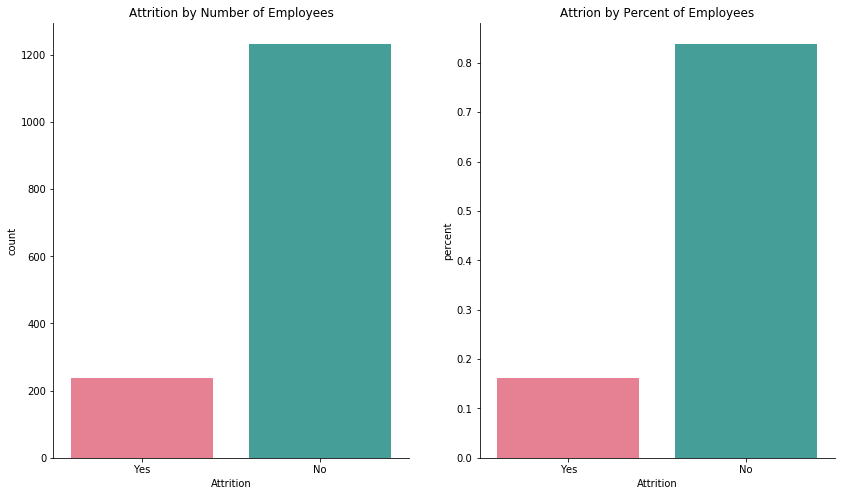

In [5]:
fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(14,8))
sns.countplot(x='Attrition',data=hr_data, ax=ax[0],palette='husl')
sns.barplot(x="Attrition", y='Age',data=pct_attrition, ax=ax[1],order=['Yes','No'],palette='husl')
sns.despine(right=True,top=True)

ax[0].set(title='Attrition by Number of Employees')

ax[1].set(title='Attrion by Percent of Employees', ylabel='percent')

### From the graphs above, it's clear that the proportion staying is greater than the proportion leaving. However, further reducing turnover would save money and help the business. What's factors contribute to turnover? First, I'll look at age, which could be an important factor. For example, younger people earlier in their careers may be more likely to leave for better opportunites or greater diversity of experiences. On the other hand, older employees may retire.

# Age

[Text(0.5, 1.0, 'Stayed')]

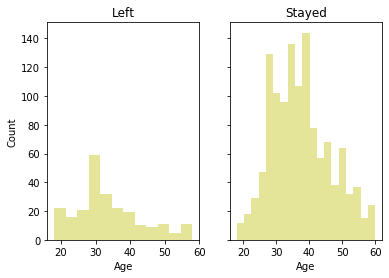

In [6]:
left = hr_data[hr_data.Attrition=='Yes']
stayed = hr_data[hr_data.Attrition=='No']

fig, ax = plt.subplots(1,2,sharey=True)
sns.distplot(left['Age'],ax=ax[0],kde=False,color='y')
sns.distplot(stayed['Age'],ax=ax[1],kde=False,color='y')

ax[0].set(title='Left',ylabel='Count')
ax[1].set(title='Stayed')



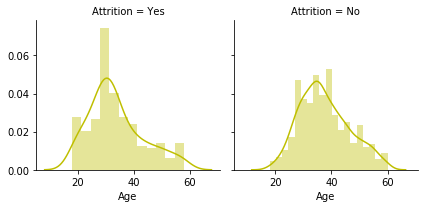

In [7]:
g = sns.FacetGrid(hr_data, col='Attrition', margin_titles=True)
g.map(sns.distplot,'Age',color='y')

### Observations:
    The distribution of ages does differ across the two groups. The distribution of those who left is right skewed,       meaning that more turnover is occuring among younger employees, while the distribution for those who stay is         normal.

# Department
## Are employees in certain departments more likely to turnover?

In [8]:
by_dpt = pd.crosstab(hr_data.Department, hr_data.Attrition,normalize='index').rename_axis(None)
by_dpt *= 100
by_dpt.style.background_gradient(cmap='GnBu')

Attrition,No,Yes
Human Resources,80.9524,19.0476
Research & Development,86.1602,13.8398
Sales,79.3722,20.6278


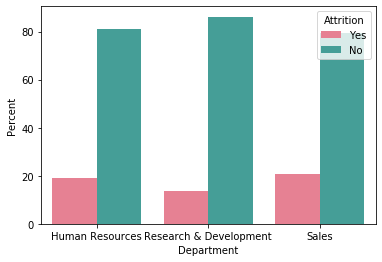

In [9]:
by_dpt.reset_index(inplace=True)
by_dpt.rename(columns={'index':'Department'},inplace=True)
by_dpt.index.rename('index',inplace=True)


tidy = by_dpt.melt(id_vars='Department',var_name='Attrition', value_name='Percent')
sns.barplot(x='Department',y='Percent',hue='Attrition',data=tidy,hue_order=['Yes','No'],palette='husl')

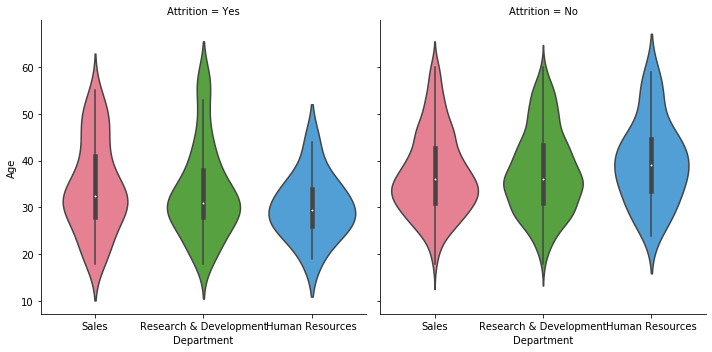

In [10]:
g2 = sns.catplot(x='Department',y='Age',col='Attrition',data=hr_data,kind='violin',palette='husl')

## Observations:
    Attrition is highest in sales (not particularly surprising, given the stress levels associated with the job).     Interestingly, HR closely follows sales. Moreover, the violin plot shows that among all three departments, attrition is generally higher among younger employees.

# Gender:
## Is turnover concentrated within one gender?

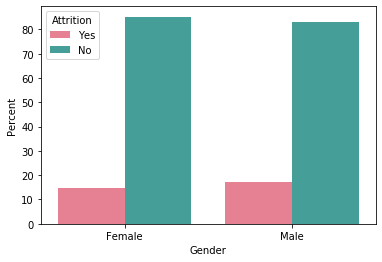

In [11]:
by_gender = pd.crosstab(hr_data.Gender, hr_data.Attrition, normalize='index') * 100
by_gender=by_gender.reset_index()
by_gender=by_gender.melt(id_vars='Gender',var_name='Attrition',value_name='Percent')

sns.barplot(x='Gender',y='Percent',data=by_gender,hue='Attrition',hue_order=['Yes','No'],palette='husl')

In [138]:
pd.crosstab([hr_data.Gender,hr_data.Department],hr_data.Attrition,normalize='index') * 100

Attrition                             No        Yes
Gender Department                                  
Female Human Resources         70.000000  30.000000
       Research & Development  88.654354  11.345646
       Sales                   79.894180  20.105820
Male   Human Resources         86.046512  13.953488
       Research & Development  84.536082  15.463918
       Sales                   78.988327  21.011673

In [86]:
pd.crosstab([hr_data.Gender,hr_data.JobRole],hr_data.Attrition,normalize='index') * 100

Attrition                                No        Yes
Gender JobRole                                        
Female Healthcare Representative  90.196078   9.803922
       Human Resources            62.500000  37.500000
       Laboratory Technician      81.176471  18.823529
       Manager                    95.744681   4.255319
       Manufacturing Director     94.444444   5.555556
       Research Director          96.969697   3.030303
       Research Scientist         85.087719  14.912281
       Sales Executive            84.848485  15.151515
       Sales Representative       57.894737  42.105263
Male   Healthcare Representative  95.000000   5.000000
       Human Resources            83.333333  16.666667
       Laboratory Technician      73.563218  26.436782
       Manager                    94.545455   5.454545
       Manufacturing Director     91.780822   8.219178
       Research Director          97.872340   2.127660
       Research Scientist         83.146067  16.853933
       Sales Executive            80.927835  19.072165
       Sales Representative       62.222222  37.777778

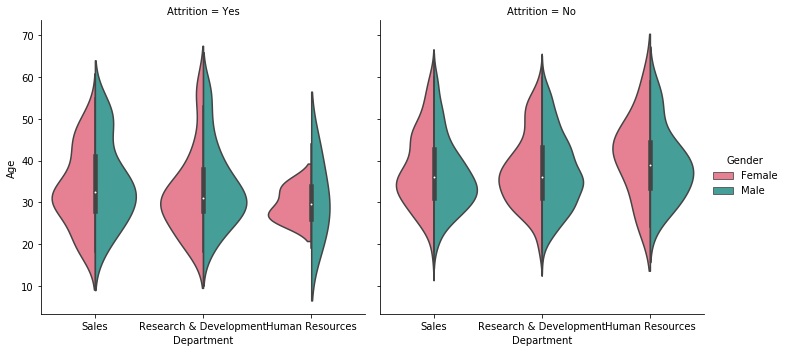

In [13]:
g2 = sns.catplot(x='Department',y='Age',col='Attrition',hue='Gender',data=hr_data,kind='violin',split=True,palette='husl')

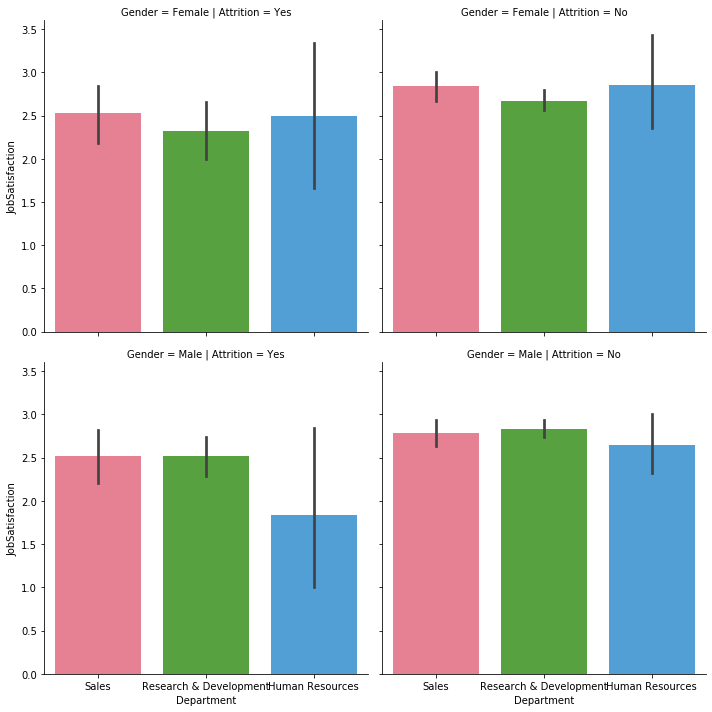

In [118]:
sat_df = hr_data[['Department','Age','Gender', 'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction','Attrition']]
g3 = sns.catplot(x='Department',y='JobSatisfaction',row='Gender',col='Attrition',data=sat_df,kind='bar',palette='husl')

In [119]:
sat_df['age_category'] = np.where(sat_df.Age<= 35,'young',np.where((sat_df.Age > 35) 
                               & (sat_df.Age <= 50), 'middle','old'))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
pd.crosstab([sat_df.Department,sat_df.age_category],sat_df.JobSatisfaction) #.plot.barh(stacked=True)

JobSatisfaction                       1   2    3    4
Department             age_category                  
Human Resources        middle         6   9    7    7
                       old            0   4    1    2
                       young          5   7    7    8
Research & Development middle        80  70  130  116
                       old           18  17   33   30
                       young         94  87  137  149
Sales                  middle        32  40   43   58
                       old            9   6    8   15
                       young         45  40   76   74

In [90]:
def likert_chart(var):
    '''Function to create chart for ordinal data.'''
    fig, ax = plt.subplots(3,2,sharex=True,sharey=True,figsize=(14,8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    cmap='tab20b'

    dpts = ['Human Resources', 'Sales', 'Research & Development']
    d=0 #set index for departments to be incremented inside for loop

    for i in range(3):
        for j in range(2):
            d = d
            if j==0:
                g='Male'
            else:
                g='Female'

            ct = (pd.crosstab(sat_df[(sat_df.Department==dpts[d])&(sat_df.Gender==g)].Attrition,sat_df[var],normalize='index')*100).plot(kind='barh',
            #create crosstab to format data and create original bar chart                                                                                                                                      stacked=True, 
                                                                                                                                                 ax=ax[i,j],
                                                                                                                                                 colormap=cmap)
            ax[i,j].spines['top'].set_visible(False) #remove unnecessary spines
            ax[i,j].spines['right'].set_visible(False) 
            ax[i,j].set_title(g + "s in " + dpts[d]) #create titles for each subplot
            ax[i,j].get_legend().remove() #remove legend
        d+=1
    hand, labl = ax[0,0].get_legend_handles_labels() #need to use one specific ax
    handout=[]
    lablout=[]
    for h,l in zip(hand,labl): #loop to ensure no repeated legends
        if l not in lablout:
            lablout.append(l)
            handout.append(h)
    fig.legend(handout, lablout,title='Rating',bbox_to_anchor=(0,1), loc="upper left", frameon=False,
               bbox_transform=fig.transFigure, ncol=4) #create one leg for entire figure
    fig.suptitle( var + ' by Gender and Department', ha='center', fontsize='medium',fontweight='semibold') #title for entire fig
    
    return fig, ax
    # handles, labels = ax.get_legend_handles_labels()
    # by_label = dict(zip(labels, handles))
    # plt.figlegend(loc=7)

(<Figure size 1008x576 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130d9cf28>,
       dtype=object))

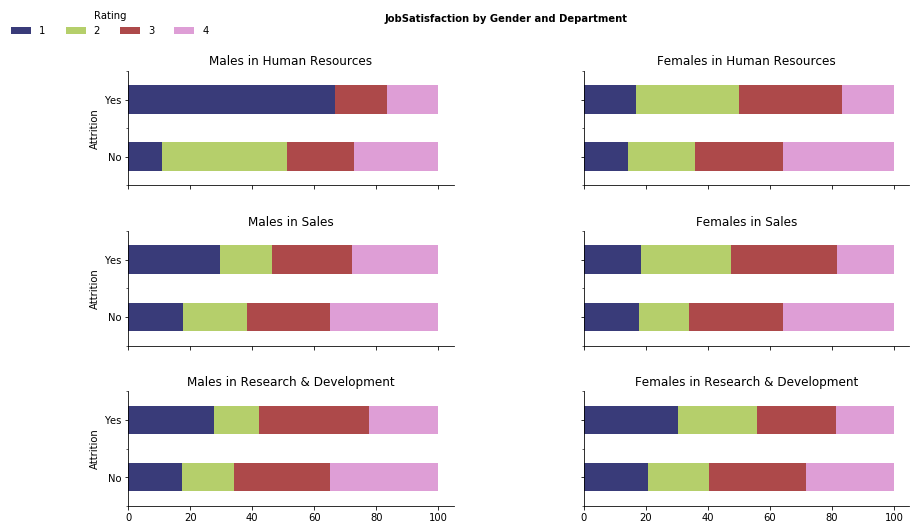

In [120]:
likert_chart('JobSatisfaction')

In [148]:
(pd.crosstab([sat_df.Attrition,sat_df.Department,sat_df.Gender],
            sat_df.JobSatisfaction,normalize='index') * 100).style.background_gradient('RdBu')

## Observations:
At the macro level, there is not a big differnece in attrition between genders. Breaking down the male/female divide a bit further to look at departments, we see that, among females attrition is highest in HR followed by Sales. For men, attrition is actually lowest in HR (and highest in sales). Bringing in age as a factor, we see that, for women in HR who do leave, the majority are in the range from 20-35 while for males the distribution is more normal. Interestingly, though attrition is higher for women in HR then men, women who leave have higher job satisfaction. For sales and R&D, satisfaction is relatively also high among those who left. This is confirmed from the crosstab above, which shows many 3 ratings for those who left. This indicates that something else is driving turnover.

# Relationship and Environment Satisfaction:
## How do work environment and interactions affect attrition?

(<Figure size 1008x576 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1388668d0>,
       dtype=object))

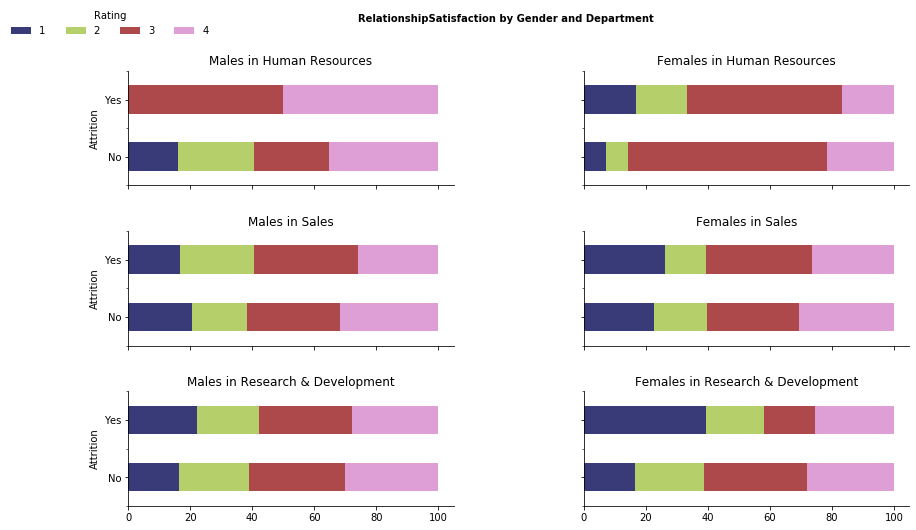

In [163]:
likert_chart(var='RelationshipSatisfaction')

(<Figure size 1008x576 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bde8240>,
       dtype=object))

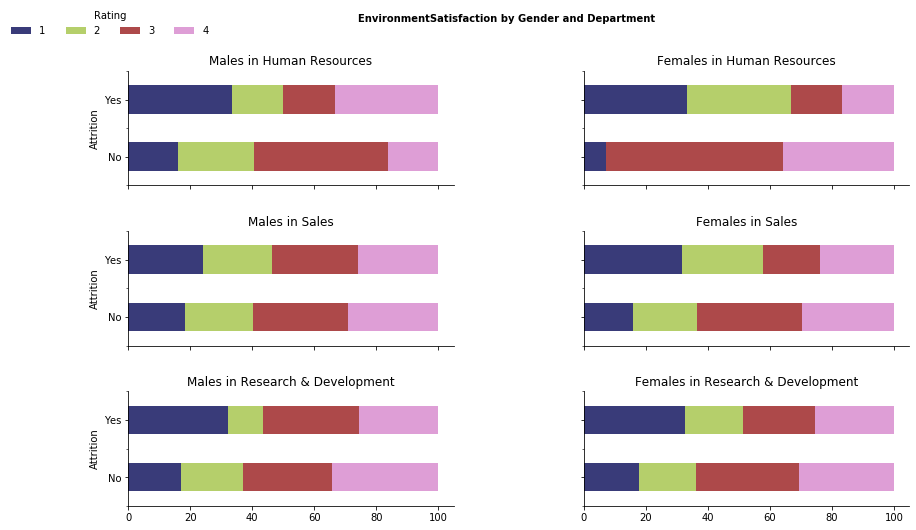

In [164]:
likert_chart('EnvironmentSatisfaction')

#### The two figures above on relationship and environment satisfaction indicate that, for women, these two variables may be related to turnover. With the exception of sales, women in each department have greater 1 and 2 ratings than do men and the ones and twos are higher for those who leave.

In [180]:
# def crosstab(col,**index):
#     return pd.crosstab([index], col, normalize='index') * 100

In [45]:
by_jobrole = pd.crosstab([hr_data.Department,hr_data.JobRole],hr_data.Attrition,normalize='index') * 100
by_jobrole.style.background_gradient('GnBu')
by_jobrole.reset_index(inplace=True)
by_jobrole = by_jobrole.melt(id_vars=['Department','JobRole'],var_name='Attrition',value_name='Percent')

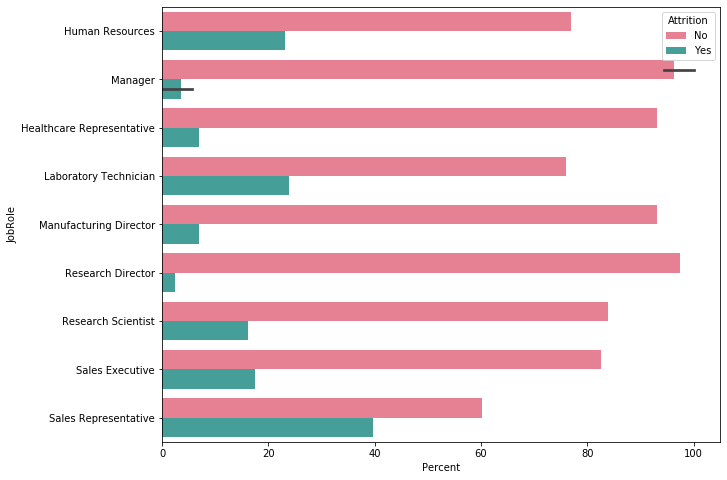

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Percent',y='JobRole',hue='Attrition',data=by_jobrole,palette='husl')

#### The graph shows that attrition is greater among those with lower titles (sales rep vs. manager, lab tech vs. director, etc.). This, combined with the charts on environment and relationship satisfaction may indiccate that turnover may be caused in part by issues with managers. Let's look at 'yearswithcurrentmanager' to see if there is a relationship there.

In [82]:
def pivot_(index):
    pvt = hr_data.loc[hr_data.Attrition=='Yes'].pivot_table(values='Attrition',index=index,columns='JobRole',aggfunc='count',margins=True,fill_value=0)
    pvt = pvt.div(pvt.iloc[-1,:],axis=1).round(4) * 100
    pvt = pvt.iloc[:-1,:-1].style.background_gradient('RdBu')
    return pvt

In [39]:
pivot_('YearsWithCurrManager')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
YearsWithCurrManager,,,,,,,,,
0,33.33,50,46.77,0,10,0,31.91,22.81,54.55
1,0,0,4.84,0,10,0,10.64,3.51,0
2,0,33.33,22.58,0,10,0,14.89,21.05,36.36
3,0,0,8.06,0,10,0,10.64,12.28,3.03
4,0,8.33,4.84,20,10,0,4.26,3.51,3.03
5,22.22,0,0,0,0,0,2.13,1.75,0
6,11.11,8.33,3.23,0,0,0,0,0,0
7,22.22,0,6.45,20,20,0,19.15,21.05,3.03
8,0,0,1.61,0,10,100,6.38,5.26,0


#### Looking at the more entry level roles (Healthcare Rep, HR, Lab Tech, and Sales Rep), we see that Attrition is highest where YearsWithCurrManager is 0 (so less than a year). This indicates that there may be dissatisfaction due to relationships with new managers that is causing attrition. I'd also like to look at some of the variables that influence job environment to see their effect.

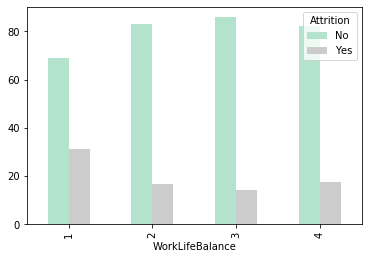

In [114]:
def create_bar(i):
    t = pd.crosstab(hr_data[i],hr_data.Attrition,normalize='index') * 100
    t.plot(kind='bar',cmap='Pastel2')
    
create_bar('WorkLifeBalance')

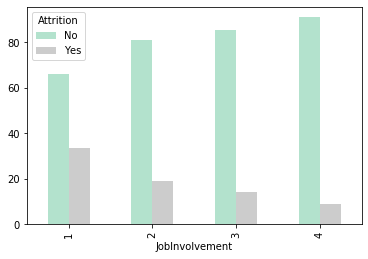

In [115]:
create_bar('JobInvolvement')

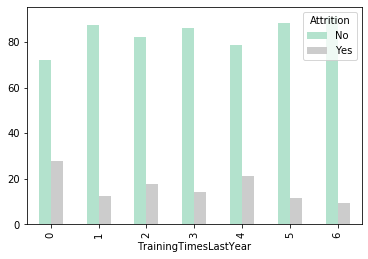

In [116]:
create_bar('TrainingTimesLastYear')

#### Attrition seems to decrease as JobInvolvement and WorkLifeBalance ratings increase. However, the effect of Training Times last year is less clear/strong.

# Salary

In [48]:
salary_cols = ['Department', 'JobRole', 'Gender','HourlyRate','DailyRate', 'MonthlyRate',
               'MonthlyIncome','StockOptionLevel', 'PercentSalaryHike', 'OverTime', 'Attrition']
salary_df = hr_data[salary_cols]
salary_df.head()

,Department,JobRole,Gender,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,StockOptionLevel,PercentSalaryHike,OverTime,Attrition
0,Sales,Sales Executive,Female,94,1102,19479,5993,0,11,Yes,Yes
1,Research & Development,Research Scientist,Male,61,279,24907,5130,1,23,No,No
2,Research & Development,Laboratory Technician,Male,92,1373,2396,2090,0,15,Yes,Yes
3,Research & Development,Research Scientist,Female,56,1392,23159,2909,0,11,Yes,No
4,Research & Development,Laboratory Technician,Male,40,591,16632,3468,1,12,No,No


In [54]:
pd.crosstab([hr_data.JobRole,hr_data.Attrition], hr_data.OverTime, normalize='index').style.background_gradient('RdBu')

In [77]:
salary_df.groupby(['JobRole','Gender']).agg([np.mean]).round(4).style.background_gradient('RdBu')

## Salary Notes:
- On an hourly rate, on average, women in HR are paid less than men whereas male sales reps are paid more than women
but on a daily rate, women in HR are paid more.
- Managers and RD's make the most on a monthly basis
- Stock option level is lowest for sales reps, which is not surprising
- Salary hike is lowest for women/men in HR and sales executives and pretty high for sales reps


In [ ]:
# combine age and totalworkingyears into one feature (career phase/stage)?
# make age a categorical feature (over/under 35ish)

# Other Variables

## Travel: Do high travel levels lead to greater attrition?

In [127]:
travel_by_role = pd.crosstab(hr_data.JobRole,hr_data.BusinessTravel,normalize='index') * 100
travel_by_role.reset_index(inplace=True)
travel_by_role = travel_by_role.melt(id_vars='JobRole',var_name='TravelLevel', value_name='Percent')


,JobRole,TravelLevel,Percent
0,Healthcare Representative,Non-Travel,11.450382
1,Human Resources,Non-Travel,7.692308
2,Laboratory Technician,Non-Travel,10.810811
3,Manager,Non-Travel,11.764706
4,Manufacturing Director,Non-Travel,8.965517
5,Research Director,Non-Travel,7.500000
6,Research Scientist,Non-Travel,9.589041
7,Sales Executive,Non-Travel,11.963190
8,Sales Representative,Non-Travel,6.024096
9,Healthcare Representative,Travel_Frequently,19.847328


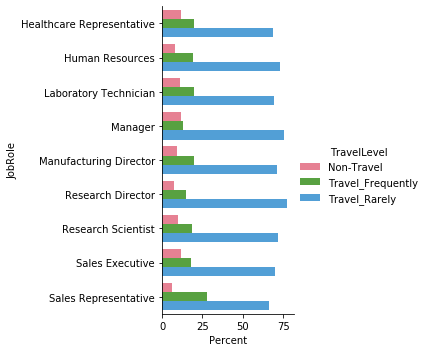

In [130]:
sns.catplot(x='Percent', y='JobRole',hue='TravelLevel',data=travel_by_role,kind='bar',palette='husl')

In [125]:
bus_travel = pd.crosstab(hr_data.Attrition,[hr_data.BusinessTravel], normalize='index') * 100
bus_travel.style.background_gradient('GnBu',axis=1)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,11.1922,16.8694,71.9384
Yes,5.06329,29.1139,65.8228


In [149]:
marital_status_travel = pd.crosstab([hr_data.MaritalStatus,hr_data.BusinessTravel,], hr_data.Attrition, normalize='index') * 100
marital_status_travel.style.background_gradient('GnBu')

# Correlations

### As a step before model creation, it is good to look at which variables are highly correlated to get a sense of which variables may not be necessary in the final model and which exhibit multicollinearity. The below heatmap shows correlations between all non-categorical columns.

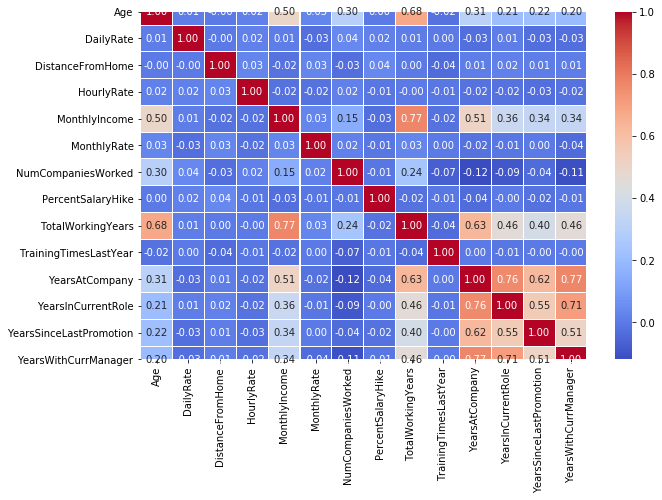

In [160]:
non_cat_cols = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
                'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

f, ax = plt.subplots(figsize=(10, 6))
corr = hr_data[non_cat_cols].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

## Observations
- Age and total working years are highly correlated
- TotalWorkingYears is also highly correlated with YearsAtCompany and Monthly Income
- The lower right block of variables show high correlation between YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager. It may be that not all of these variables are necessary